In [4]:
import numpy as np
import pylab
from qiskit.aqua.algorithms import ExactEigensolver
from qiskit.chemistry.drivers import PySCFDriver
from qiskit.chemistry.core import Hamiltonian

molecule = 'H; O 1 1.08; H 2 {} 1 104.5'

start = 1.25
by    = 0.5
steps = 20
energies  = np.empty(steps+1)
distances = np.empty(steps+1)
dipoles   = np.empty(steps+1)

print('Processing step __', end='')
for i in range(steps+1):
    print('\b\b{:2d}'.format(i), end='', flush=True)
    d = start + i*by/steps 
    driver = PySCFDriver(molecule.format(d/2), basis='sto3g')
    qmolecule = driver.run()
    operator = Hamiltonian(freeze_core=True, orbital_reduction=[-3, -2])
    qubit_op, aux_ops = operator.run(qmolecule)
    result = ExactEigensolver(qubit_op, aux_operators=aux_ops).run()
    lines, result = operator.process_algorithm_result(result)
    distances[i] = d
    energies[i] = result['energy']
    dipoles[i]  = result['total_dipole_moment']
print(' --- complete')

print('Distances: ', distances)
print('Energies:', energies)
print('Dipole moments:', dipoles)

Processing step 20 --- complete
Distances:  [1.25  1.275 1.3   1.325 1.35  1.375 1.4   1.425 1.45  1.475 1.5   1.525
 1.55  1.575 1.6   1.625 1.65  1.675 1.7   1.725 1.75 ]
Energies: [-74.60730567 -74.64319653 -74.67609616 -74.70624343 -74.73385699
 -74.75913706 -74.78226699 -74.80341467 -74.82273385 -74.84036532
 -74.85643798 -74.87106984 -74.88436893 -74.89643411 -74.90735587
 -74.91721695 -74.92609303 -74.93405326 -74.94116078 -74.94747313
 -74.95304271]
Dipole moments: [0.75003754 0.7458285  0.74158664 0.7373082  0.73299077 0.72863317
 0.72423539 0.7197986  0.71532498 0.71081773 0.70628098 0.7017197
 0.69713848 0.69254661 0.68795021 0.68335755 0.67877774 0.67422066
 0.66969715 0.66521893 0.66079876]


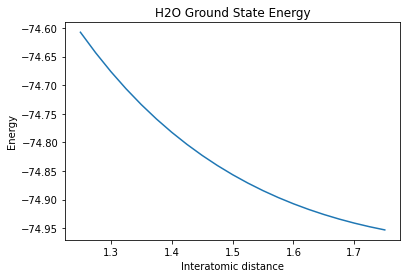

In [5]:
pylab.plot(distances, energies)
pylab.xlabel('Interatomic distance')
pylab.ylabel('Energy')
pylab.title('H2O Ground State Energy');

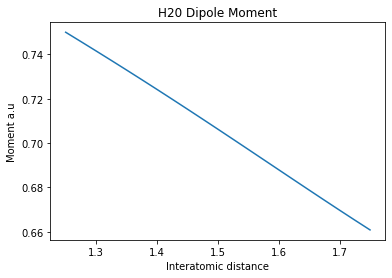

In [6]:
pylab.plot(distances, dipoles)
pylab.xlabel('Interatomic distance')
pylab.ylabel('Moment a.u')
pylab.title('H20 Dipole Moment');